In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [11]:
df = pd.read_csv('/content/Heart (1).csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [12]:
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')


In [13]:
#computing
summary_stats = df.describe().T
print("Summary Statistics (min, max, mean, std, percentiles):\n", summary_stats)

Summary Statistics (min, max, mean, std, percentiles):
             count        mean        std    min    25%    50%    75%    max
Unnamed: 0  303.0  152.000000  87.612784    1.0   76.5  152.0  227.5  303.0
Age         303.0   54.438944   9.038662   29.0   48.0   56.0   61.0   77.0
Sex         303.0    0.679868   0.467299    0.0    0.0    1.0    1.0    1.0
RestBP      303.0  131.689769  17.599748   94.0  120.0  130.0  140.0  200.0
Chol        303.0  246.693069  51.776918  126.0  211.0  241.0  275.0  564.0
Fbs         303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
RestECG     303.0    0.990099   0.994971    0.0    0.0    1.0    2.0    2.0
MaxHR       303.0  149.607261  22.875003   71.0  133.5  153.0  166.0  202.0
ExAng       303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
Oldpeak     303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
Slope       303.0    1.600660   0.616226    1.0    1.0    2.0    2.0    3.0
Ca          299.0    0.672241   

In [15]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
variance = df[numeric_columns].var()
ranges = df[numeric_columns].max() - df[numeric_columns].min()
print("\nVariance:\n", variance)
print("\nRange (max - min):\n", ranges)


Variance:
 Unnamed: 0    7676.000000
Age             81.697419
Sex              0.218368
RestBP         309.751120
Chol          2680.849190
Fbs              0.126877
RestECG          0.989968
MaxHR          523.265775
ExAng            0.220707
Oldpeak          1.348095
Slope            0.379735
Ca               0.878791
dtype: float64

Range (max - min):
 Unnamed: 0    302.0
Age            48.0
Sex             1.0
RestBP        106.0
Chol          438.0
Fbs             1.0
RestECG         2.0
MaxHR         131.0
ExAng           1.0
Oldpeak         6.2
Slope           2.0
Ca              3.0
dtype: float64


In [21]:
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
print(summary_stats)

            count        mean        std    min    25%    50%    75%    max  \
Unnamed: 0  303.0  152.000000  87.612784    1.0   76.5  152.0  227.5  303.0   
Age         303.0   54.438944   9.038662   29.0   48.0   56.0   61.0   77.0   
Sex         303.0    0.679868   0.467299    0.0    0.0    1.0    1.0    1.0   
RestBP      303.0  131.689769  17.599748   94.0  120.0  130.0  140.0  200.0   
Chol        303.0  246.693069  51.776918  126.0  211.0  241.0  275.0  564.0   
Fbs         303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0   
RestECG     303.0    0.990099   0.994971    0.0    0.0    1.0    2.0    2.0   
MaxHR       303.0  149.607261  22.875003   71.0  133.5  153.0  166.0  202.0   
ExAng       303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0   
Oldpeak     303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2   
Slope       303.0    1.600660   0.616226    1.0    1.0    2.0    2.0    3.0   
Ca          299.0    0.672241   0.937438    0.0    0

In [22]:
print(df.dtypes)

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object


In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['ChestPain','Thal','AHD']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

   Unnamed: 0  Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
0           1   63    1          3     145   233    1        2    150      0   
1           2   67    1          0     160   286    0        2    108      1   
2           3   67    1          0     120   229    0        2    129      1   
3           4   37    1          1     130   250    0        0    187      0   
4           5   41    0          2     130   204    0        2    172      0   

   Oldpeak  Slope   Ca  Thal  AHD  
0      2.3      3  0.0     0    0  
1      1.5      2  3.0     1    1  
2      2.6      2  2.0     2    1  
3      3.5      3  0.0     1    0  
4      1.4      1  0.0     1    0  


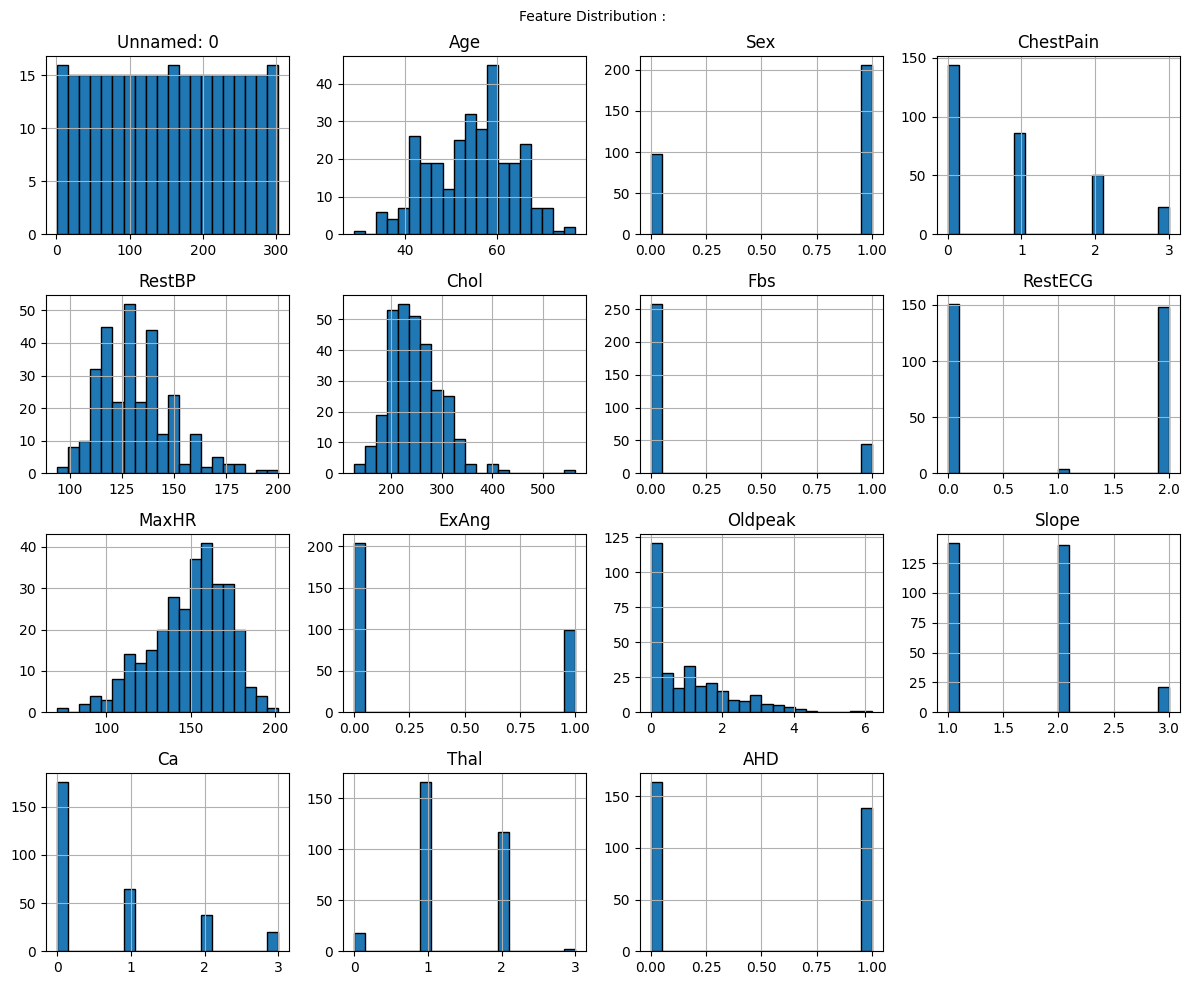

In [24]:
df.hist(figsize=(12,10) , bins = 20 , edgecolor = 'black')
plt.suptitle("Feature Distribution : ", fontsize = 10)
plt.tight_layout()
plt.show()

Data Cleaning

In [25]:
print("Missing values in each column:" , df.isnull().sum())

# if missing val present
df.fillna(df.mean(), inplace=True)

#remove dupl cols
df.drop_duplicates(inplace=True)

Missing values in each column: Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          0
AHD           0
dtype: int64


Data Transformation

In [26]:
label_encoder = LabelEncoder()
df['ChestPain'] = label_encoder.fit_transform(df['ChestPain'])
df['Thal'] = label_encoder.fit_transform(df['Thal'])
df['AHD'] = label_encoder.fit_transform(df['AHD'])

Data Model Building

In [27]:
X = df.drop('AHD', axis=1)

y = df['AHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
y_pred = model.predict(X_test)

In [33]:
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Performance:
Accuracy: 0.8688524590163934

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\nRegression Report:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R²): {r2_score(y_test, y_pred)}")


Regression Report:
Mean Absolute Error (MAE): 0.13114754098360656
Mean Squared Error (MSE): 0.13114754098360656
Root Mean Squared Error (RMSE): 0.3621429841700741
R-squared Score (R²): 0.47413793103448265
